<a href="https://colab.research.google.com/github/Mayu-infinite/Practice/blob/main/KNN_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from types import MappingProxyType
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dt = pd.read_csv('Dataset.csv')
dt

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


## Question 1
1.Load the dataset and perform necessary pre-processing. (Deal with missing/NaN
values, perform input normalization, converting categorical data to numerical
data.

In [ ]:
# findiing if any null values are present in the data
dt.isnull().sum()
dt.index = dt.index + 1
dt

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
1,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
2,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
3,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
4,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
5,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2107,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
X = dt.iloc[:,[0,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16]]
X

,Gender,Age,Height,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
1,Female,21.000000,1.620000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
2,Female,21.000000,1.520000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
3,Male,23.000000,1.800000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
4,Male,27.000000,1.800000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
5,Male,22.000000,1.780000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2107,Female,20.976842,1.710730,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,21.982942,1.748584,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,22.524036,1.752206,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,24.361936,1.739450,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
Y = dt.iloc[:,3]
Y

,Weight
1,64.000000
2,56.000000
3,77.000000
4,87.000000
5,89.800000
...,...
2107,131.408528
2108,133.742943
2109,133.689352
2110,133.346641


In [ ]:
# Categorical data handled by encoding it
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
col_for_encoding = [0,3,4,7,8,10,13,14,15]
for col in col_for_encoding:
    X.iloc[:,col] = le.fit_transform(X.iloc[:,col])
X

,Gender,Age,Height,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
1,0,21.000000,1.620000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,3,3,1
2,0,21.000000,1.520000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,3,1
3,1,23.000000,1.800000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,3,1
4,1,27.000000,1.800000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,4,5
5,1,22.000000,1.780000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2107,0,20.976842,1.710730,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,3,4
2108,0,21.982942,1.748584,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,3,4
2109,0,22.524036,1.752206,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,3,4
2110,0,24.361936,1.739450,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,3,4


In [ ]:
# Standardization
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X = std.fit_transform(X)
X

array([[-1.01191369, -0.52212439, -0.87558934, ...,  1.4191716 ,
         0.50333674, -1.03279553],
       [-1.01191369, -0.52212439, -1.94759928, ..., -0.52115952,
         0.50333674, -1.03279553],
       [ 0.98822657, -0.20688898,  1.05402854, ..., -2.46149063,
         0.50333674, -1.03279553],
       ...,
       [-1.01191369, -0.28190933,  0.54167211, ..., -0.52115952,
         0.50333674,  0.50438287],
       [-1.01191369,  0.00777624,  0.40492652, ..., -0.52115952,
         0.50333674,  0.50438287],
       [-1.01191369, -0.10211908,  0.39834438, ..., -0.52115952,
         0.50333674,  0.50438287]])

2. Perform Exploratory Data Analysis[EDA].


In [ ]:
# converting to dataframe
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.011914,-0.522124,-0.875589,0.472291,-2.759769,-0.785019,0.404153,0.300346,-0.145900,-0.013073,-0.218272,-1.188039,0.561997,1.419172,0.503337,-1.032796
1,-1.011914,-0.522124,-1.947599,0.472291,-2.759769,1.088342,0.404153,0.300346,6.853997,1.618759,4.581439,2.339750,-1.080625,-0.521160,0.503337,-1.032796
2,0.988227,-0.206889,1.054029,0.472291,-2.759769,-0.785019,0.404153,0.300346,-0.145900,-0.013073,-0.218272,1.163820,0.561997,-2.461491,0.503337,-1.032796
3,0.988227,0.423582,1.054029,-2.117337,-2.759769,1.088342,0.404153,0.300346,-0.145900,-0.013073,-0.218272,1.163820,-1.080625,-2.461491,1.296280,1.016776
4,0.988227,-0.364507,0.839627,-2.117337,-2.759769,-0.785019,-2.167023,0.300346,-0.145900,-0.013073,-0.218272,-1.188039,-1.080625,-0.521160,0.503337,1.529168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,-1.011914,-0.525774,0.097045,0.472291,0.362349,1.088342,0.404153,0.300346,-0.145900,-0.456705,-0.218272,0.783135,0.407996,-0.521160,0.503337,0.504383
2107,-1.011914,-0.367195,0.502844,0.472291,0.362349,1.088342,0.404153,0.300346,-0.145900,-0.004702,-0.218272,0.389341,-0.096251,-0.521160,0.503337,0.504383
2108,-1.011914,-0.281909,0.541672,0.472291,0.362349,1.088342,0.404153,0.300346,-0.145900,0.075361,-0.218272,0.474971,-0.019018,-0.521160,0.503337,0.504383
2109,-1.011914,0.007776,0.404927,0.472291,0.362349,1.088342,0.404153,0.300346,-0.145900,1.377801,-0.218272,0.151471,-0.117991,-0.521160,0.503337,0.504383


In [ ]:
print(dt.shape)
print(dt.describe())
print(dt.info())
print(dt.dtypes)
# List of columns to check for unique values
columns_to_check = ['Gender','family_history_with_overweight', 'FAVC','CAEC', 'SMOKE', 'SCC','CALC', 'MTRANS','NObeyesdad']

# Loop through each column and print unique values
for col in columns_to_check:
    unique_values = dt[col].unique()
    print(f"Unique values in {col}: {unique_values}")


(2111, 17)
               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.62

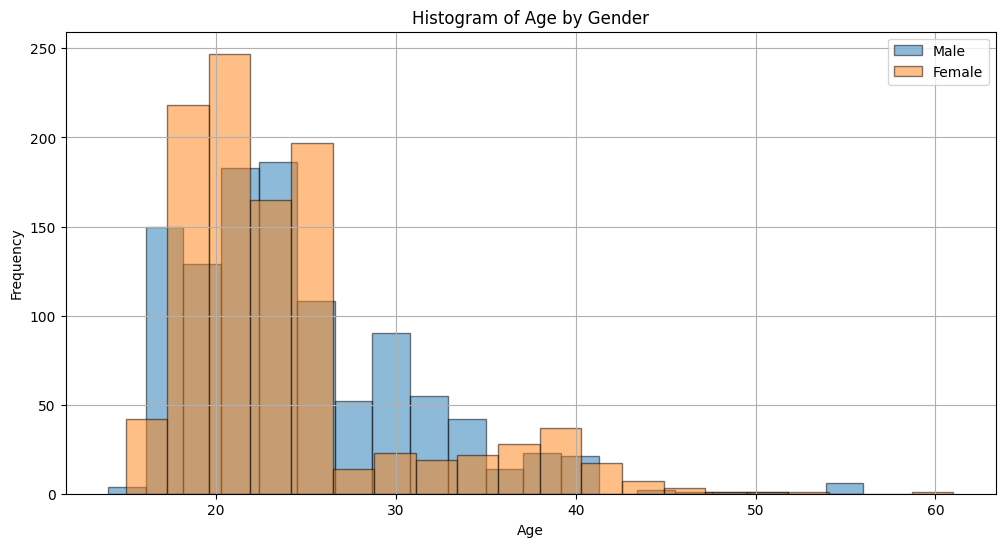

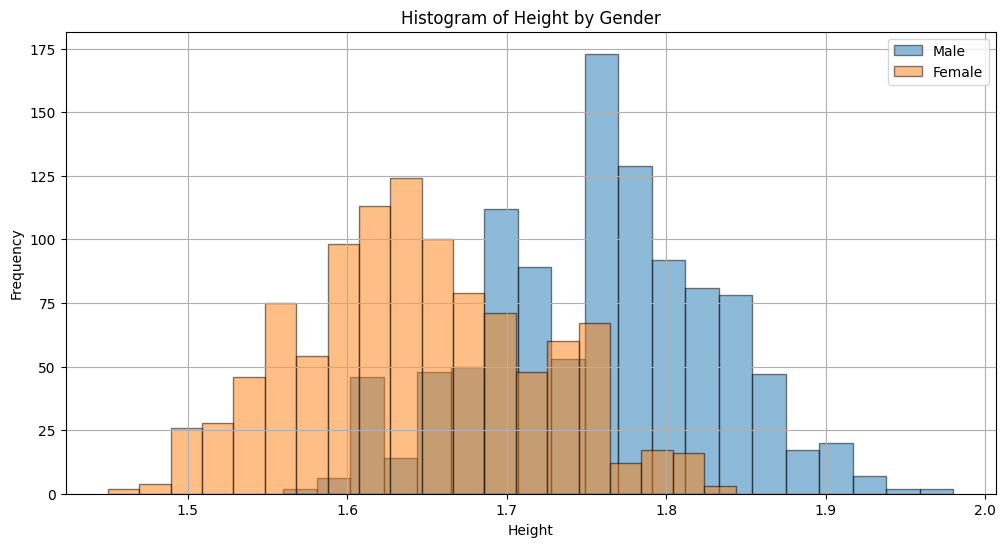

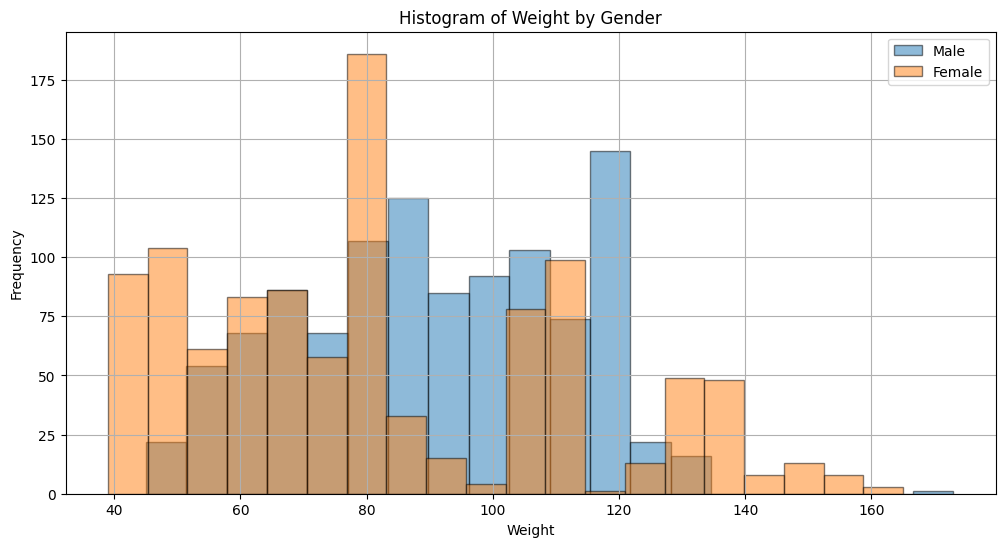

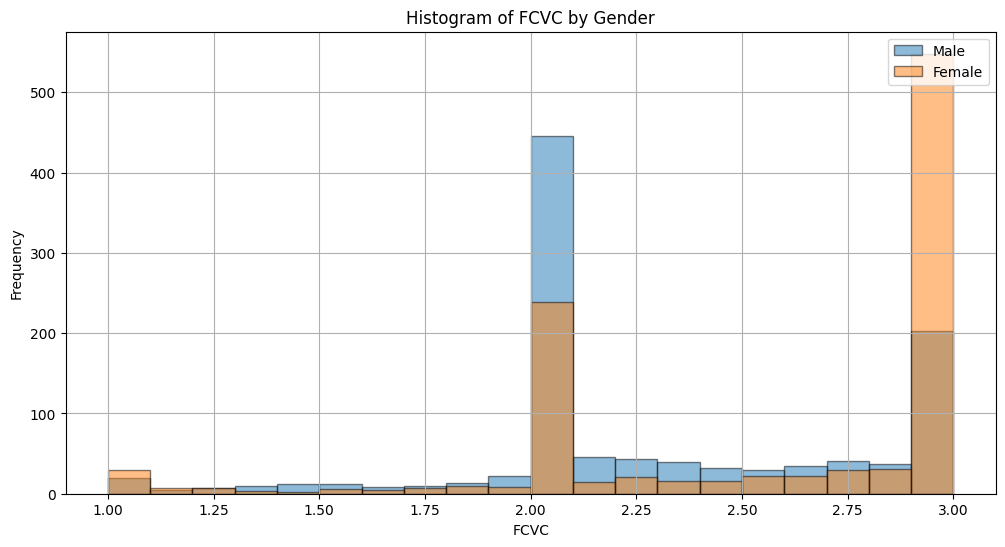

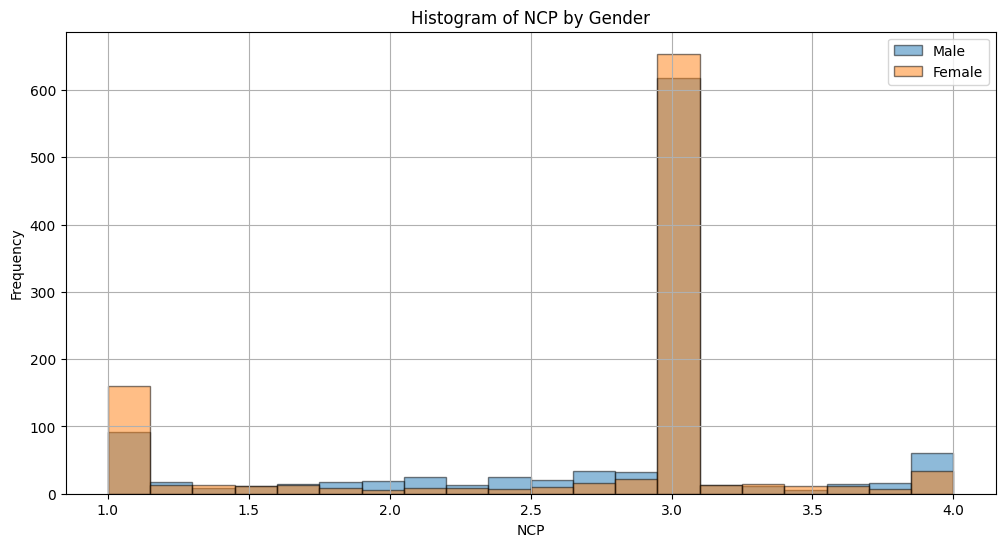

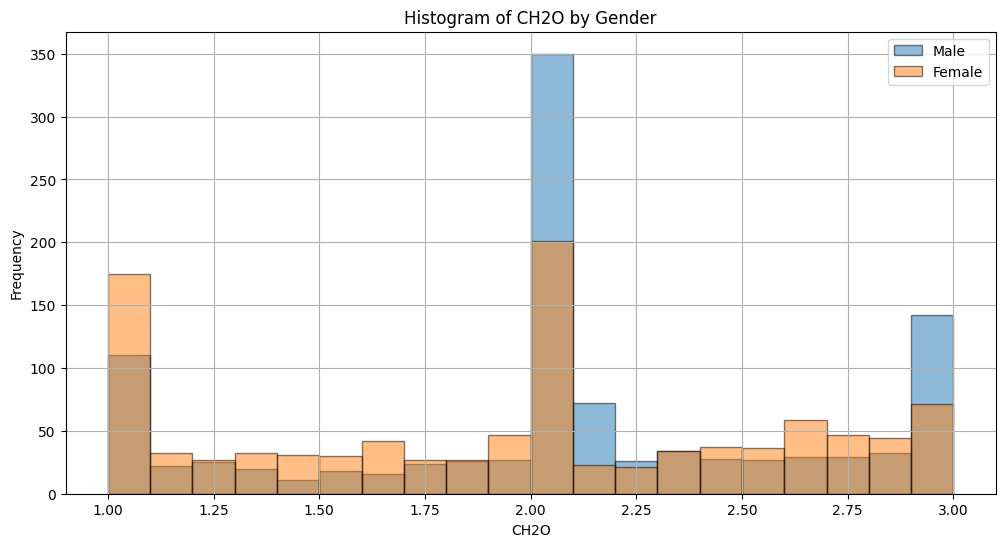

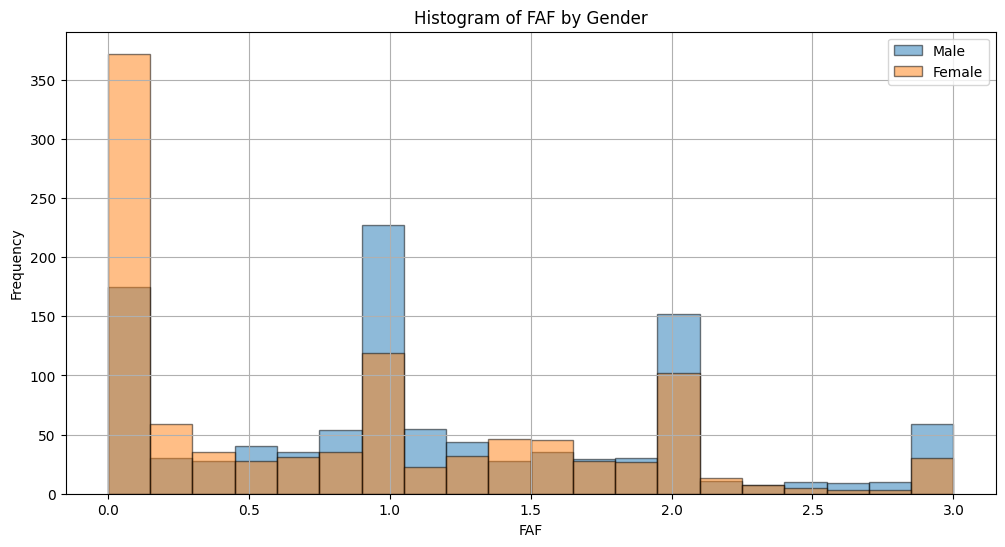

In [ ]:
import matplotlib.pyplot as plt

# List of columns for which you want to plot histograms
columns_to_plot = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF']

# Assuming 'Gender' is the column indicating gender, with values 'Male' and 'Female'
for col in columns_to_plot:
    if col in dt.columns:  # Check if column exists in dataset
        plt.figure(figsize=(12, 6))

        # Plot histogram for Male
        plt.hist(dt[dt['Gender'] == 'Male'][col].dropna(), bins=20, alpha=0.5, label='Male', edgecolor='k')

        # Plot histogram for Female
        plt.hist(dt[dt['Gender'] == 'Female'][col].dropna(), bins=20, alpha=0.5, label='Female', edgecolor='k')

        plt.title(f'Histogram of {col} by Gender')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.legend(loc='upper right')
        plt.grid(True)
        plt.show()
    else:
        print(f"Column '{col}' not found in the dataset.")
        # Here I wanted to see the distribution particularly with respect to gender

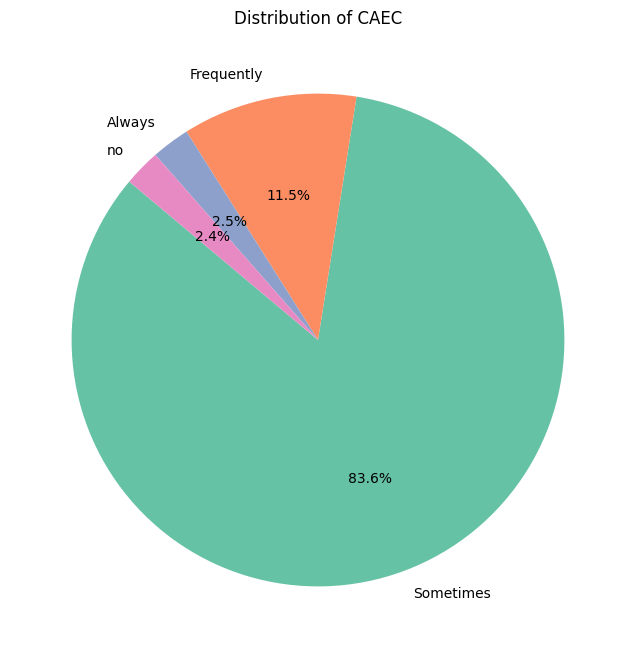

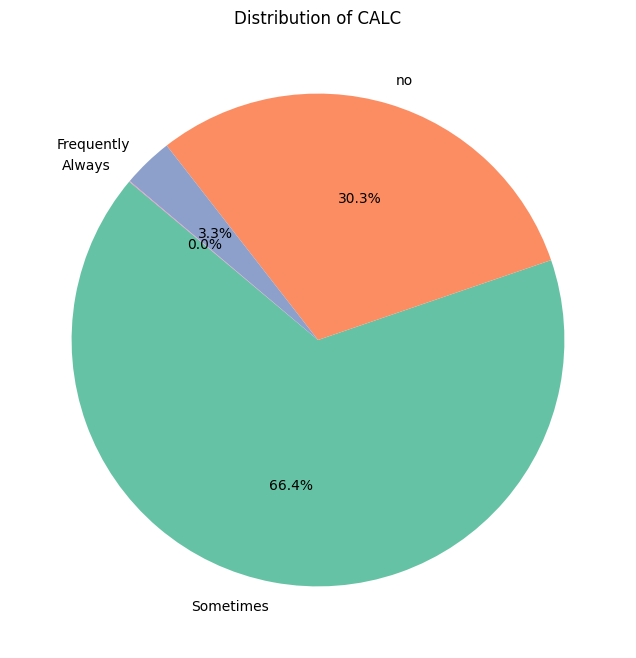

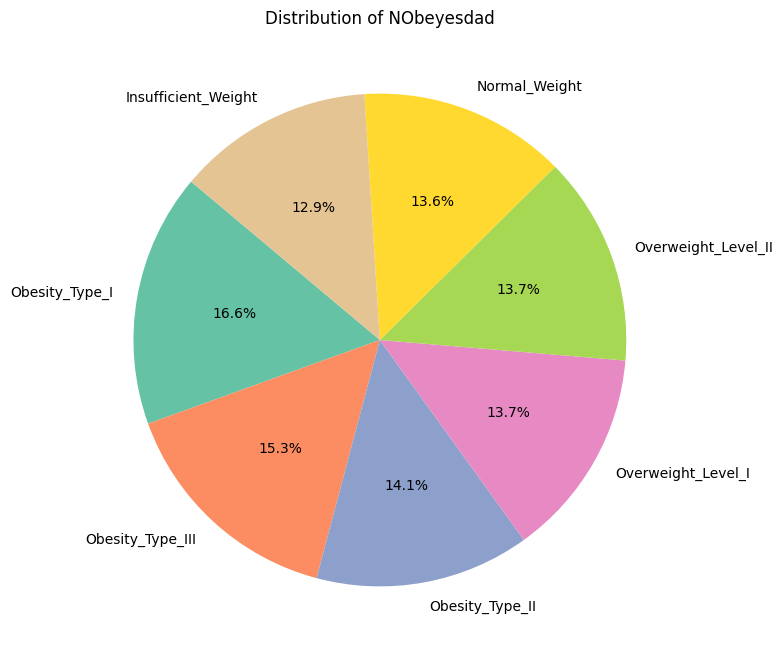

In [ ]:
import matplotlib.pyplot as plt

# List of categorical columns to plot as pie charts
categorical_columns = ['CAEC','CALC','NObeyesdad']

# Plot pie charts for the specified columns
for col in categorical_columns:
    if col in dt.columns:
        plt.figure(figsize=(8, 8))

        # Compute the distribution
        distribution = dt[col].value_counts()

        # Plotting pie chart with labels
        plt.pie(distribution, labels=distribution.index, autopct='%1.1f%%', startangle=140, colors=plt.get_cmap('Set2').colors)

        plt.title(f'Distribution of {col}')
        plt.show()
    else:
        print(f"Column '{col}' not found in the dataset.")


Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


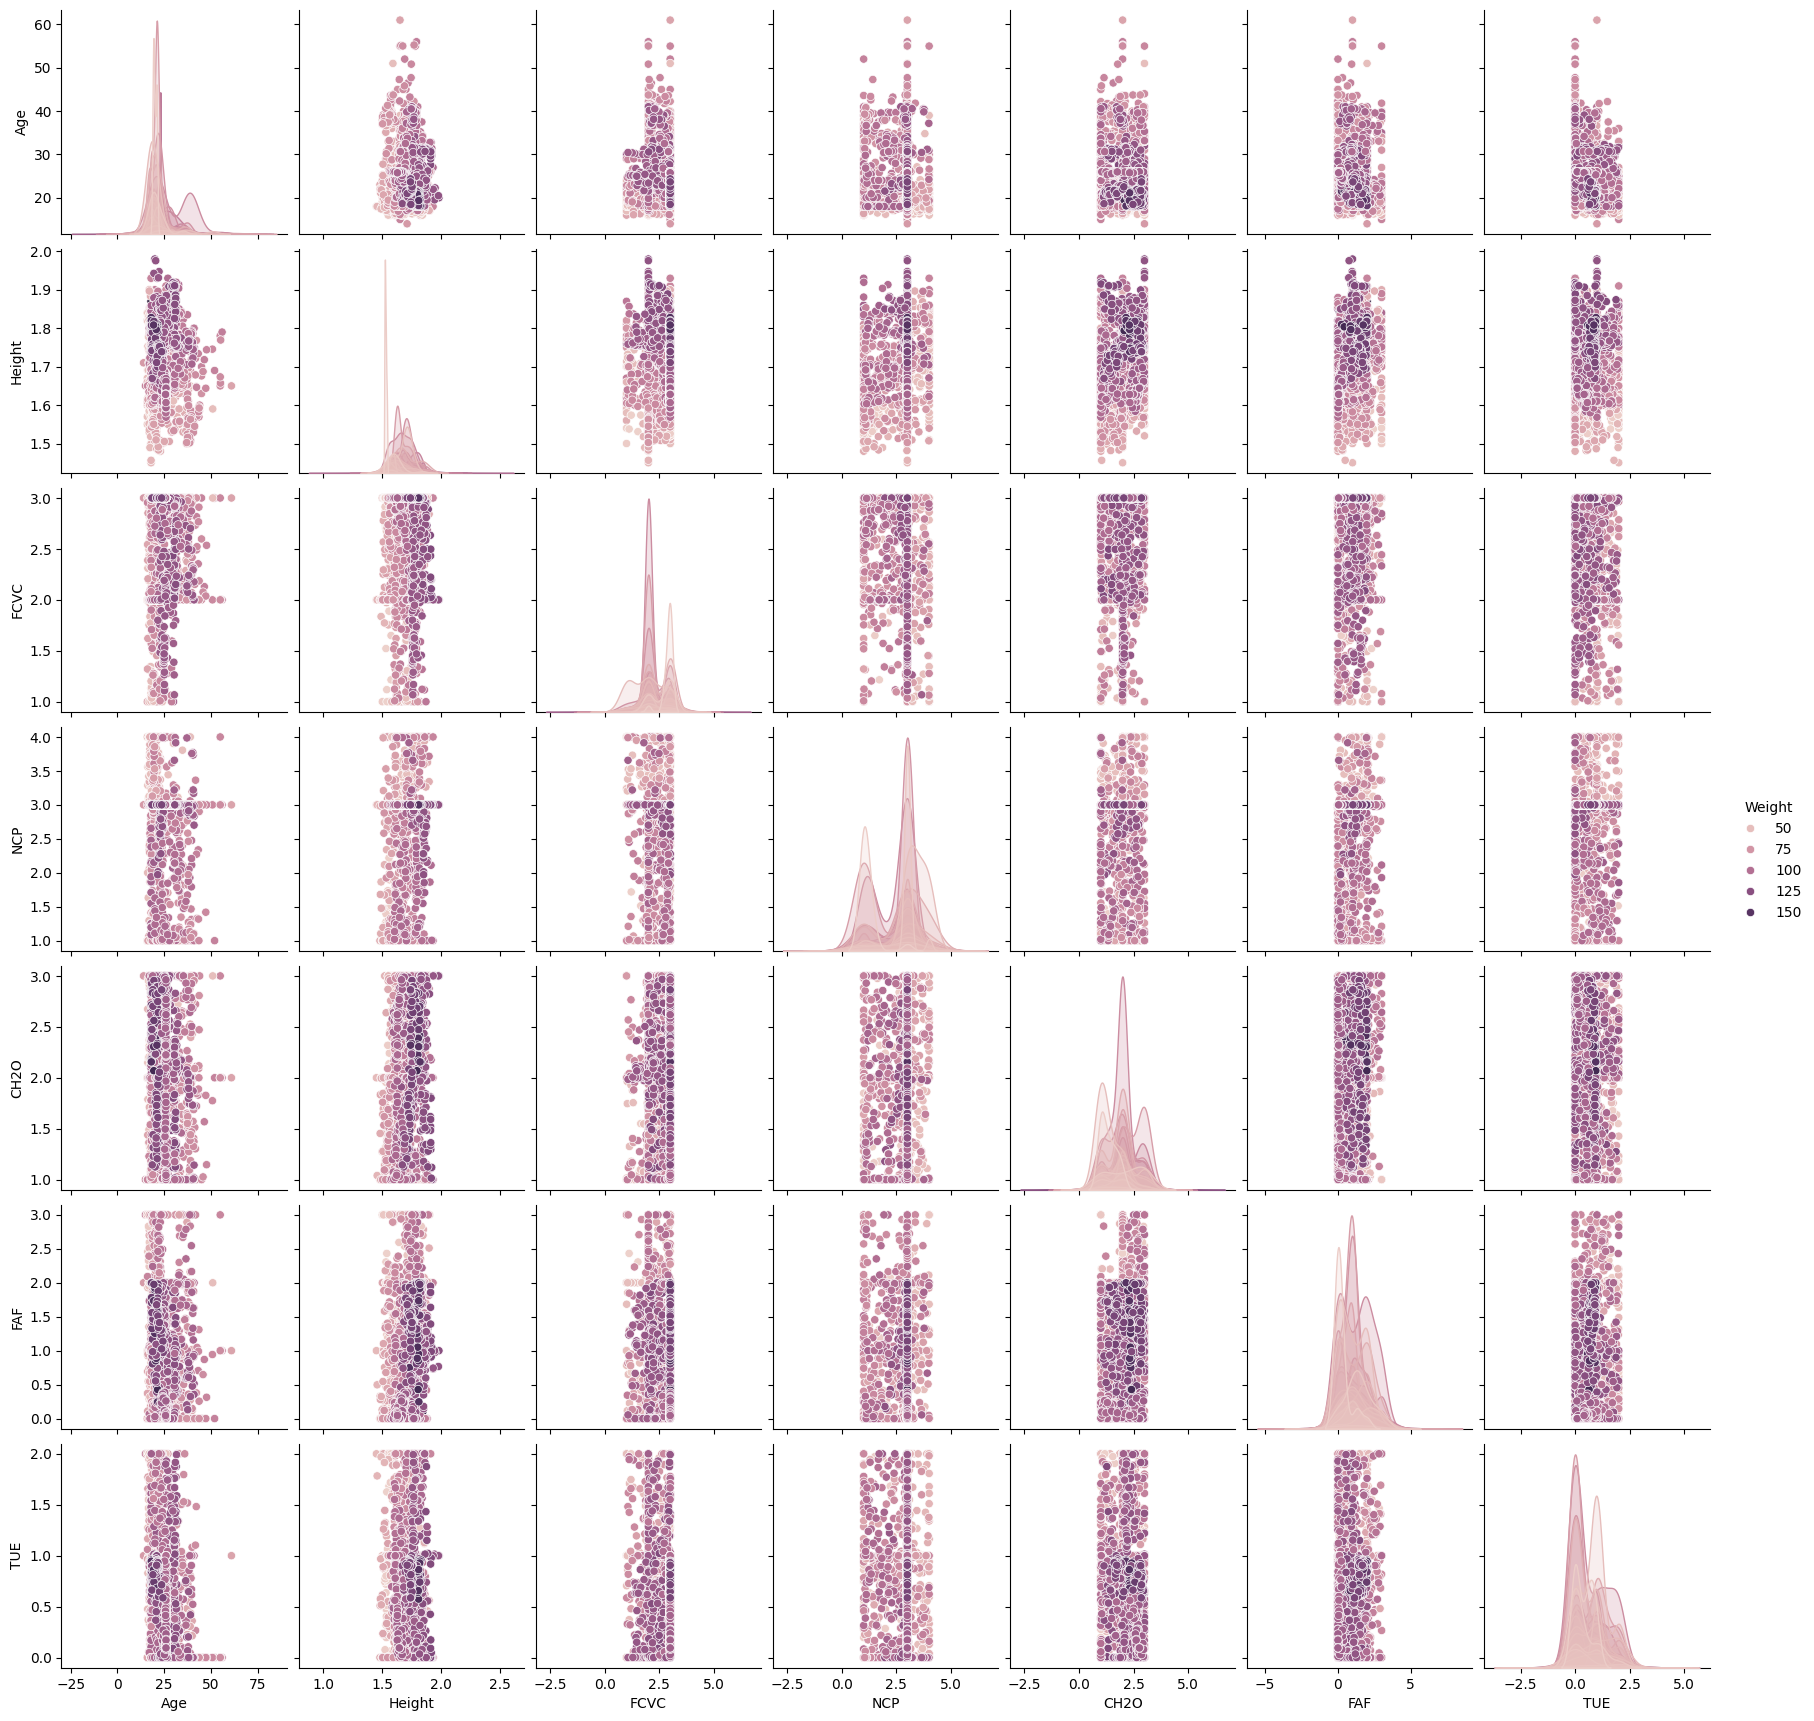

In [ ]:
import seaborn as sns
print(dt.columns)
sns.pairplot(dt, hue = 'Weight')
plt.show()

## Question 2
1. Implement distance metrics (both city-block and euclidean) from scratch.

In [ ]:
import math
dp1 = (4,9)
dp2 = (8,16)
ed = math.sqrt(((dp1[0] - dp2[0]) ** 2) + ((dp1[1] - dp2[1]) ** 2))
print( ed)
cbd = sum(abs(p - q) for p, q in zip(dp1,dp2))
print(cbd)

8.06225774829855
11


2. Implement the weighted KNN algorithm for classification from scratch.
## Question 3
 Make sure that it should:

 a]Be a class that stores the training data.
 b]Should be able to perform prediction on a single datapoint as well as
multiple data points.
 c]Should take “k” and “distance metric” as input during prediction.


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, )

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
k = int(input('Enter value of k = '))
m = input('Enter value of m = ')
knn = KNeighborsRegressor(n_neighbors = k, metric= m)
knn.fit(X_train, Y_train)

Enter value of k = 


ValueError: invalid literal for int() with base 10: ''

In [ ]:
Yp = knn.predict(X_test)
Yp

In [ ]:
Y_test

## Question 4
 Experiment with different values of K and distance metric. Mention the results, **your** observations and the reasoning behind those in the report clearly.

In [ ]:
from sklearn.metrics import r2_score
for k in range(3,30):
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_train,Y_train)
    Yp1 = knn.predict(X_test)
    print('accuracy = ', r2_score(Yp1,Y_test))


In [ ]:
dist =['manhattan','minkowski']
for m in dist:
    knn = KNeighborsRegressor(n_neighbors = 7, metric= m)
    knn.fit(X_train,Y_train)
    Yp2 = knn.predict(X_test)
    print('accuracy = ', r2_score(Yp2,Y_test))

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

# Assuming x and y are your features and target variables
x = np.array(X)  # Convert to numpy array if not already
y = np.array(Y)

# Parameters based on previous observations
k = 13
dm = 'manhattan'  # chose manhattan distance metric

# Initialize the KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=k, metric=dm)

# Define K-fold cross-validation with K=13 or any number but a positive integer
kf = KFold(n_splits=13, shuffle=True, random_state=42)

# Perform cross-validation
sc = cross_val_score(knn, x, y, cv=kf, scoring=make_scorer(r2_score))

print(sc)#'Cross-validation R^2 scores:'
print(np.mean(sc))#'Mean R^2 score:'
print( np.std(sc))#'Standard deviation of R^2 scores:'